In [2]:
import matplotlib.pyplot as plt
import numpy as np
import wave
from playsound import playsound

Enter the number of y coefficients = 2
Enter the starting point for y = -1
Enter the coefficient of y[n-(-1.0)] = 1
Enter the coefficient of y[n-(0.0)] = 2


Enter the number of x coefficients = 4
starting point for x = -2
Enter the coefficient of x[n-(-2.0)] = 1
Enter the coefficient of x[n-(-1.0)] = 2
Enter the coefficient of x[n-(0.0)] = 1
Enter the coefficient of x[n-(1.0)] = 1
LCCDE - 
1y[n-(-1.0)] + 2y[n-(0.0)] = 1x[n-(-2.0)] + 2x[n-(-1.0)] + 1x[n-(0.0)] + 1x[n-(1.0)]

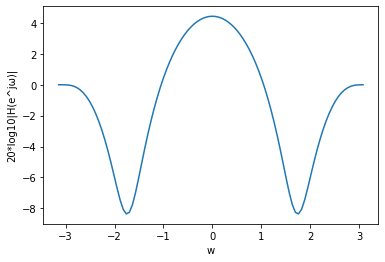

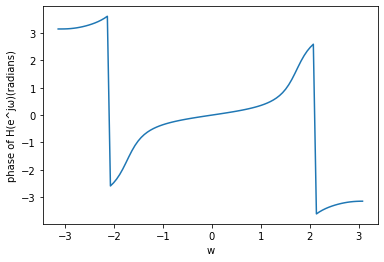

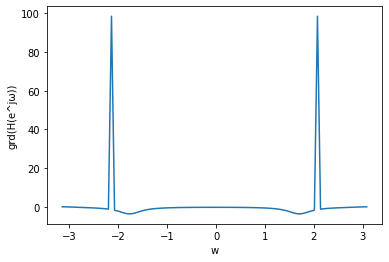

In [63]:
cy = int(input("Enter the number of y coefficients = "))
sy = int(input("Enter the starting point for y = "))
y = []
ny = np.linspace(sy,sy+cy-1,cy)
for i in range(cy):
    inp = int(input("Enter the coefficient of y[n-("+str(ny[i])+")] = "))
    y.append(inp)
    
print()
print()

cx = int(input("Enter the number of x coefficients = "))
sx = int(input("starting point for x = "))
x = []
nx = np.linspace(sx,sx+cx-1,cx)
for i in range(cx):
    inp = int(input("Enter the coefficient of x[n-("+str(nx[i])+")] = "))
    x.append(inp)

print("LCCDE - ")
for i in range(cy-1):
    if(y[i] != 0):
        print(str(y[i])+"y[n-("+str(ny[i])+")] + ",end = "")
        
print(str(y[cy-1])+"y[n-("+str(ny[cy-1])+")] = ",end = "")

for i in range(cx-1):
    if(x[i] != 0):
        print(str(x[i])+"x[n-("+str(nx[i])+")] + ",end = "")
print(str(x[cx-1])+"x[n-("+str(nx[cx-1])+")]",end = "")

#Number of values of w
N = 100
#omega in the range -π ≤ ω < π
w = np.linspace(-np.pi,np.pi,N,endpoint = False)

mag_h = np.zeros(N)
ph_h = np.zeros(N)
for i in range(N):
    X = 0
    Y = 0
    for j in range(cy):
        X += y[j]*np.exp(-1j*ny[j]*w[i]) 
    mag_X = abs(X)
    ph_X = np.angle(X)
    for j in range(cx):
        Y += x[j]*np.exp(-1j*nx[j]*w[i]) 
    mag_Y = abs(Y)
    ph_Y = np.angle(Y)
    mag_h[i] = mag_Y/mag_X
    ph_h[i] = ph_Y - ph_X

maglog = 20*np.log10(mag_h)

def group_delay(ph_h):
    grd_h = []
    for i in range(N-1):
        grd = -(ph_h[i+1]-ph_h[i])/(w[i+1]-w[i])
        grd_h.append(round(grd,4))
    grd_h.append(grd)
    return grd_h
    
grd_h = group_delay(ph_h)
plt.xlabel("w")
plt.ylabel("20*log10|H(e^jω)|")
plt.plot(w, maglog) 
plt.show()

plt.xlabel("w")
plt.ylabel("phase of H(e^jω)(radians)")
plt.plot(w, ph_h) 
plt.show()

plt.xlabel("w")
plt.ylabel("grd(H(e^jω))")
plt.plot(w,grd_h) 
plt.show()


In [38]:
#Analysys equation
def DTFT(w,signal,n):
    y = []
    #Appending the summations for all omegas(w)
    for i in range(len(w)):

        #Summation for analysis equation for a particular omega(w[i])
        sum = 0
        for j in range(len(signal)):
              sum += signal[j]*complex(np.cos(w[i]*n[j]),-np.sin(w[i]*n[j]))
        y.append(sum)
    return y

#Convolution function accepts input signal and impulse response as the parameters
def convolution(x,h):
    k = len(x)                                         #variable k stores length of input signal
    l = len(h)                                         #variable l stores length of impulse response
    p = k+l
    Y = np.zeros(p-1)                                  #length of output signal of convolution is k+l-1
    for i in range(0,p-1):                             #Filling in all the array values of output signal
        for j in range(0,k):                           #iteration over length of impulse response signal
            if i-j < l and i-j >= 0  :                 #impulse response is defined only for index greater than or equal to 0 and less than signal length
                Y[i]=Y[i]+x[j]*h[i-j]                  #Convolution sum
    return Y                                           #returns output signal i.e convolution of x and h

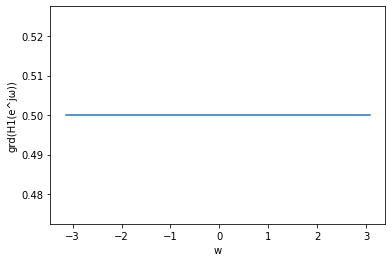

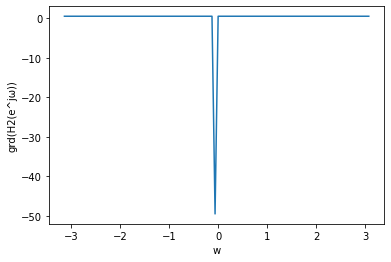

We see that in both the cases the group delay is 0.5

Showing the delay for first case -


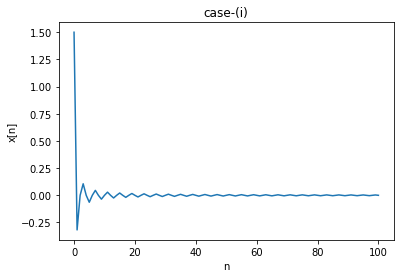

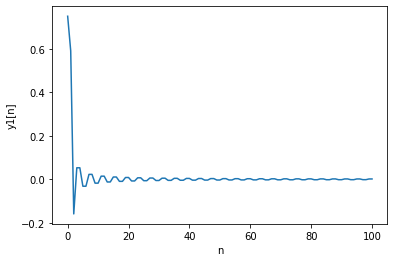

Showing the delay for second case -


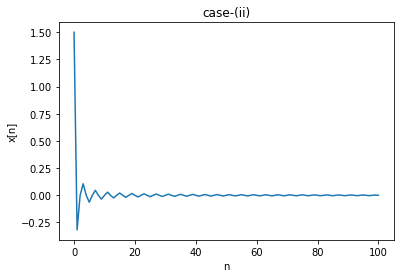

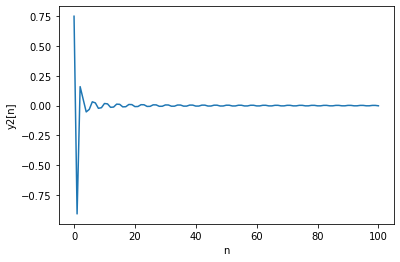

We see that the delay in poth the cases is close to 0.5 as calculated above


In [78]:
def delta(n):
    if n!=0:     #if n!=0 then it returns 0
        return 0  
    else:
        return 1 #else it returns zero

l = 100  #For the range of the signal i.e signal lies between 0 to l
n = np.linspace(0,l-1,l)
h1 = np.zeros(l)

#h1[n]
h1 = np.array([0.5, 0.5])
#h1[n]
h2 = np.array([0.5, -0.5])



#Sinc is a low pass filter
wo = np.pi/2
s = wo*np.sinc(wo*n/np.pi)/np.pi
    
x = np.zeros(l)
x = s*(np.cos(wo*n)+np.cos(2*wo*n)+np.cos(3*wo*n))
    
y1 = convolution(x,h1)
y2 = convolution(x,h2)

dtft_h1 = DTFT(w,h1,n)
dtft_h2 = DTFT(w,h2,n)
phase1 = []
phase2 = []
for i in range(len(w)):
    phase1.append(np.angle(dtft_h1[i]))
    phase2.append(np.angle(dtft_h2[i]))

grd1 = group_delay(phase1)
grd2 = group_delay(phase2)
xpad1 = np.pad(x,(0,len(y1)-len(x)),'constant',constant_values = 0)
n1 = np.linspace(0,len(y1)-1,len(y1))
xpad2 = np.pad(x,(0,len(y2)-len(x)),'constant',constant_values = 0)
n2 = np.linspace(0,len(y2)-1,len(y2))

plt.xlabel("w")
plt.ylabel("grd(H1(e^jω))")
plt.plot(w,grd1) 
plt.show()

plt.xlabel("w")
plt.ylabel("grd(H2(e^jω))")
plt.plot(w,grd2) 
plt.show()
print("We see that in both the cases the group delay is 0.5")
print()


print("Showing the delay for first case -")
plt.title("case-(i)")
plt.xlabel("n")
plt.ylabel("x[n]")
plt.plot(n1,xpad1) 
plt.show()

plt.xlabel("n")
plt.ylabel("y1[n]")
plt.plot(n1,y1)
plt.show()
print("Showing the delay for second case -")
plt.title("case-(ii)")
plt.xlabel("n")
plt.ylabel("x[n]")
plt.plot(n1,xpad1) 
plt.show()

plt.xlabel("n")
plt.ylabel("y2[n]")
plt.plot(n2,y2)
plt.show()

print("We see that the delay in poth the cases is close to 0.5 as calculated above")
